In [27]:
from simsopt.mhd.vmec import Vmec
import numpy as np
vmec_file = 'results_previous/QH/optimization_QH_beta2.5/wout_final.nc'
# vmec_file = 'results_previous/QA/optimization_QA_beta2.5/wout_final.nc'
vmec=Vmec(vmec_file)
surf = SurfaceRZFourier.from_wout(vmec_file)

0.12109251201766703
0.11595697552641782


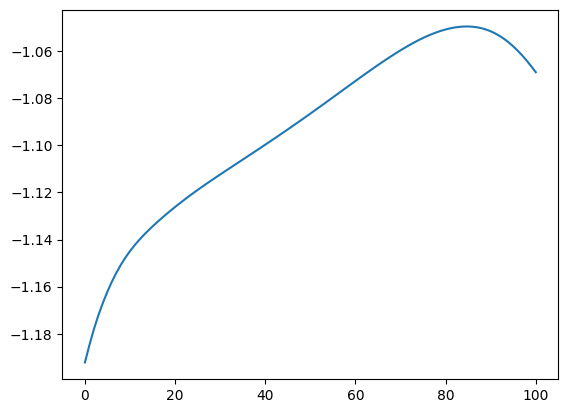

In [25]:
print(vmec.mean_shear())
print(vmec.wout.iotas[-2]-vmec.wout.iotas[2])
import matplotlib.pyplot as plt
plt.plot(vmec.wout.iotaf)

In [29]:
shear_min_QA=0.2;shear_min_QH=0.2;QA_or_QH='QA'
def shear_objective(vmec): return np.min((np.abs(vmec.mean_shear())-(shear_min_QA if QA_or_QH=='QA' else shear_min_QH),0))
print(np.abs(vmec.mean_shear()))
print(shear_objective(vmec))

0.12109251201766703
-0.07890748798233298
